In [158]:
# snapshots from wikipedia 


In [1]:
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import binom
import pylab
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')
import scipy


## Variance : 

- variance is the expectation of the squared deviation of a random variable from its population mean or sample mean.


- Variance is a measure of dispersion, meaning it is a measure of how far a set of numbers is spread out from their average value. 


- The variance is the square of the standard deviation, the second central moment of a distribution, and the covariance of the random variable with itself, and it is often represented by sigma ^{2},s^{2}, Var(X), V(X).


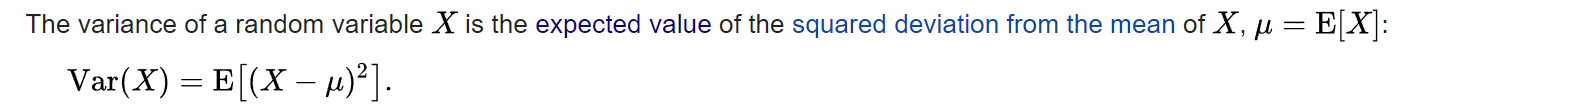

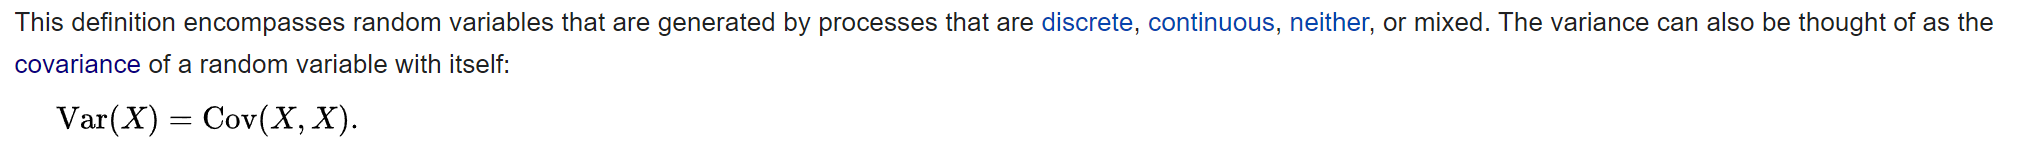

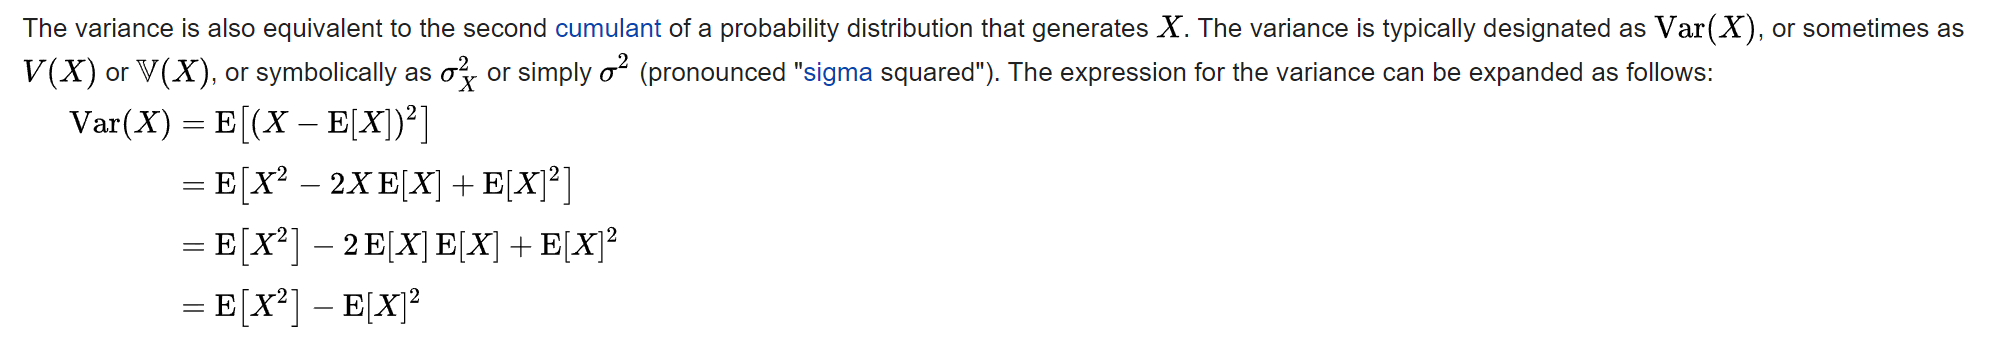


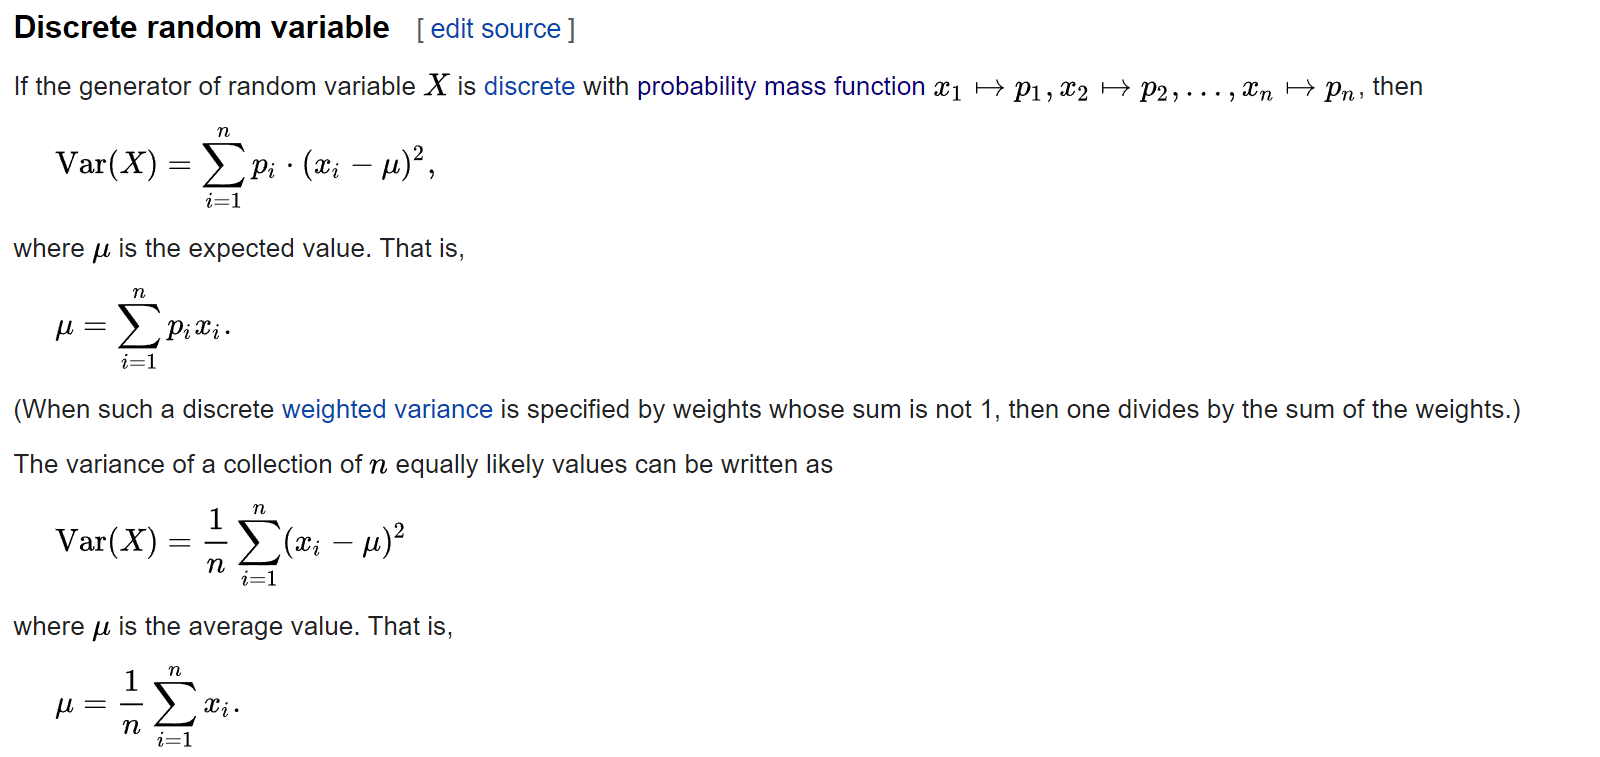


- The variance of a set of n equally likely values can be equivalently expressed, without directly referring to the mean, in terms of squared deviations of all pairwise squared distances of points from each other

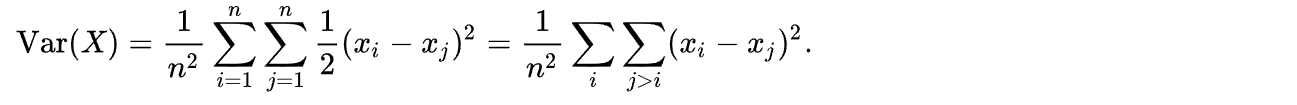

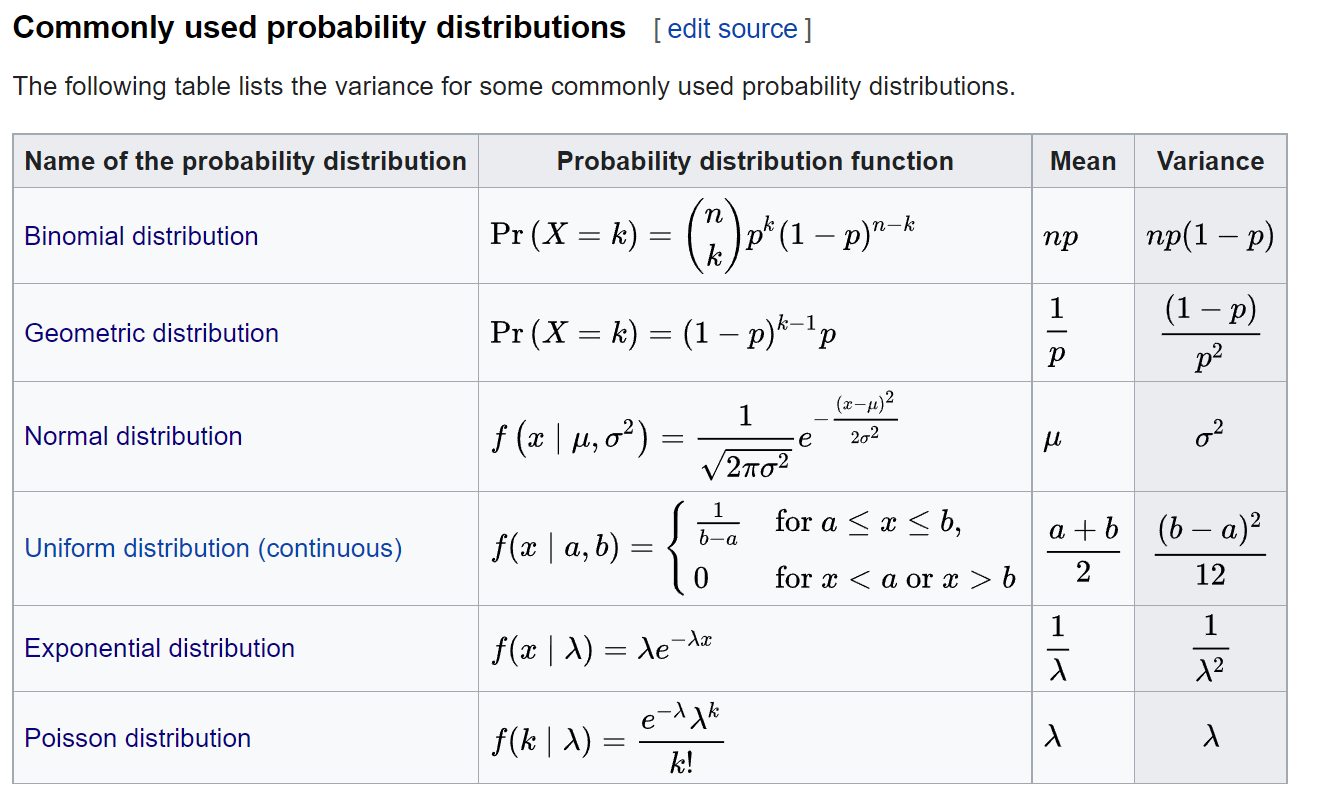

 ## Properties of variance  : 
 
 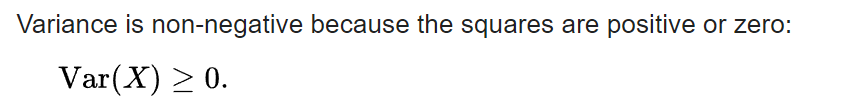
 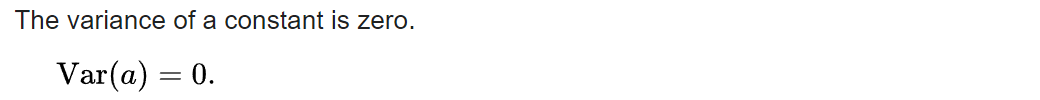
 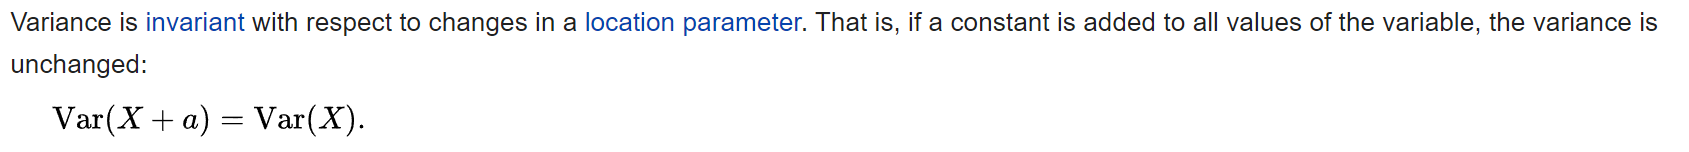
 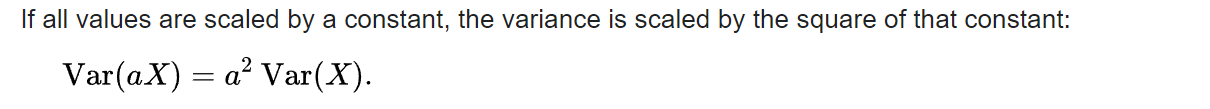
 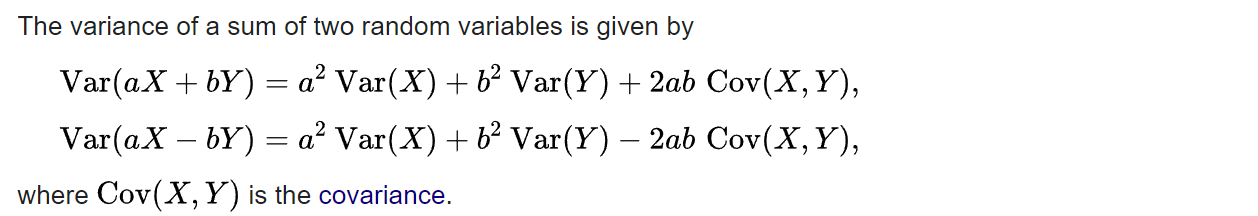
 

# Covariance : 

- covariance is a measure of the joint variability of two random variables.
- If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values (that is, the variables tend to show similar behavior), the covariance is positive.
- In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (that is, the variables tend to show opposite behavior), the covariance is negative. 
- The `sign of the covariance therefore shows the tendency in the linear relationship between the variables.` 
- The magnitude of the covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables. 
- The `normalized version of the covariance, the correlation coefficient`, however, shows by its magnitude the strength of the linear relation.

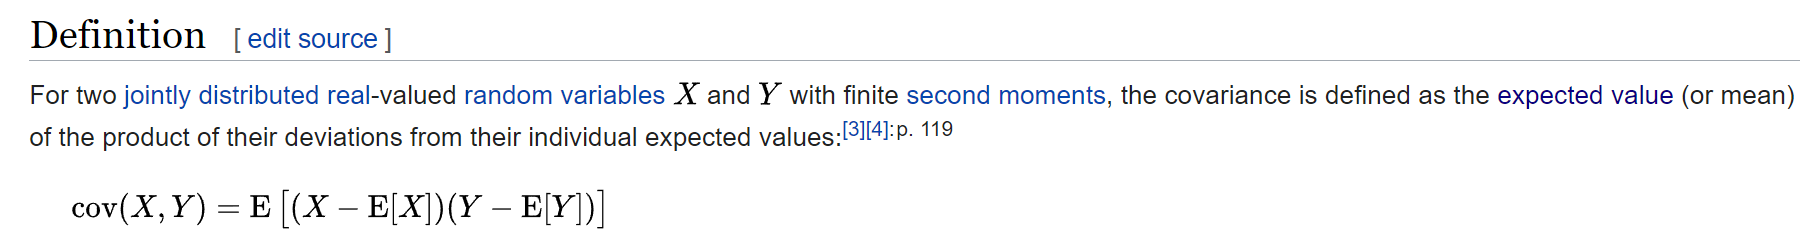

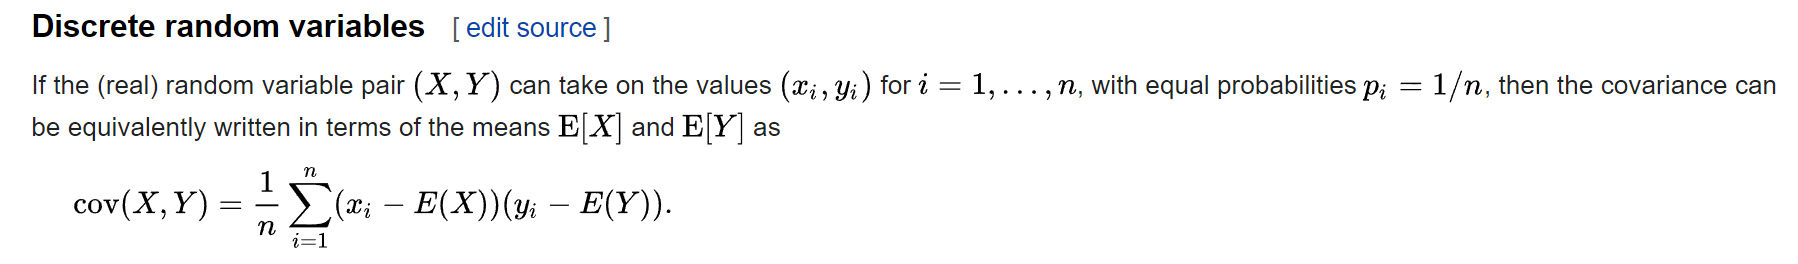

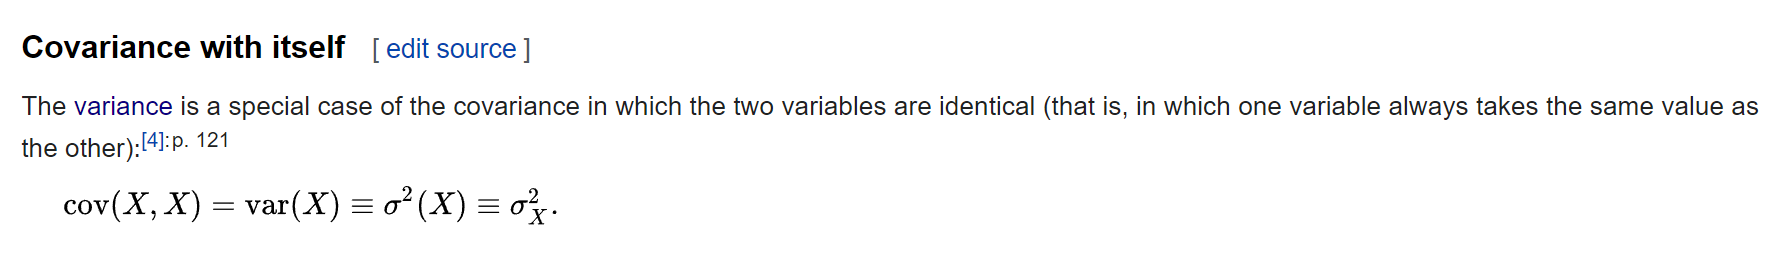
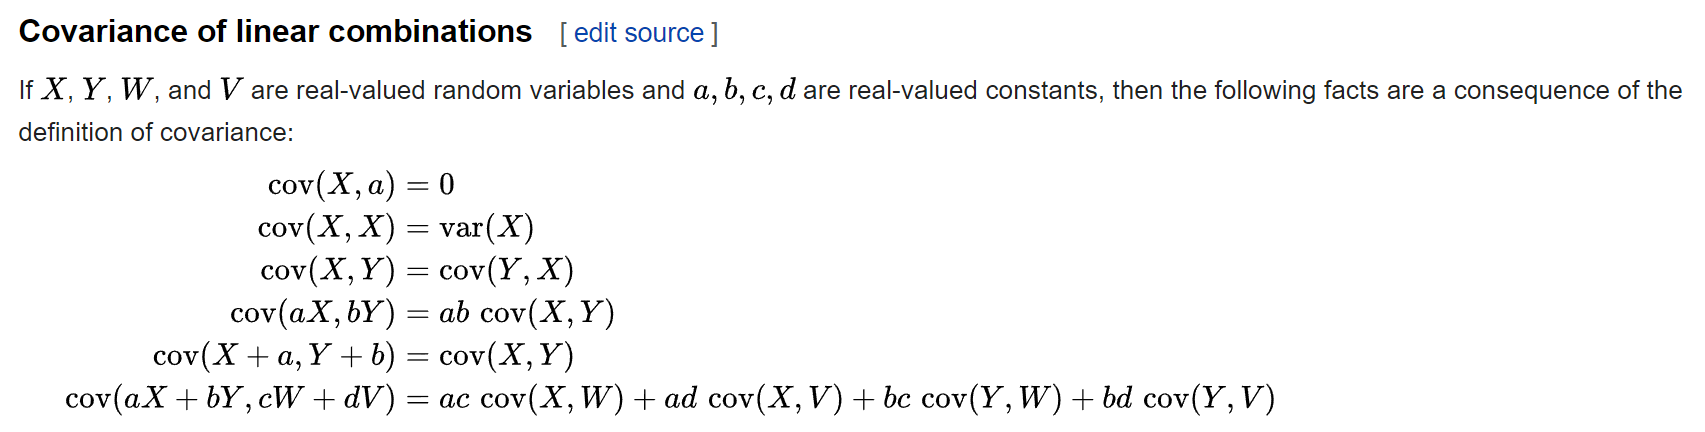


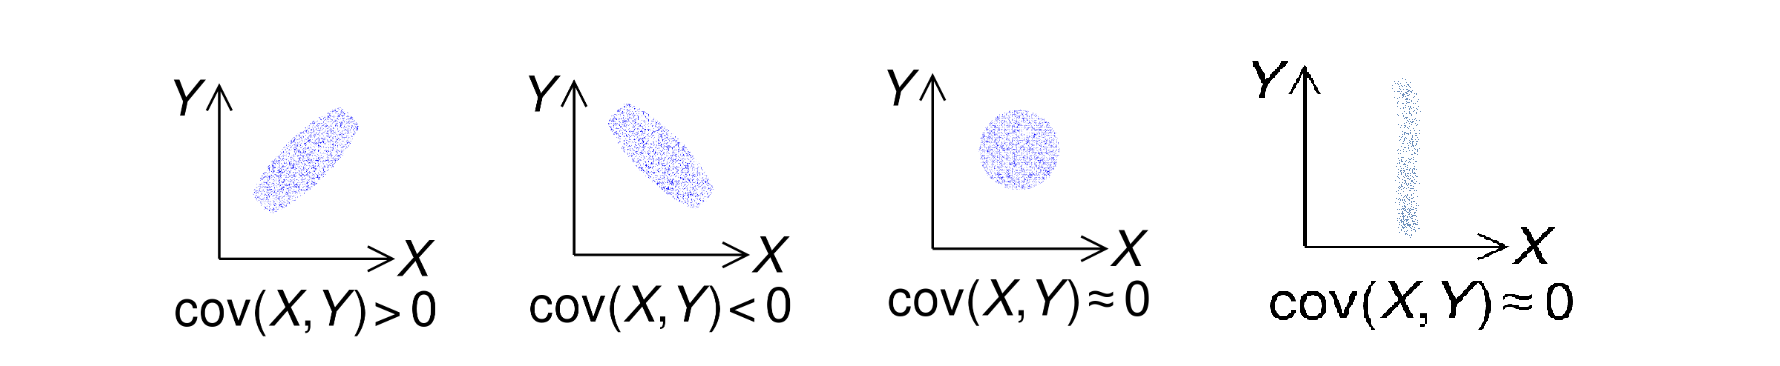

# Correlation : 

 - correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. 
 - Although in the broadest sense, "correlation" may indicate any type of association, in statistics it normally refers to the degree to which a pair of variables are linearly related.
 - Familiar examples of dependent phenomena include the correlation between the height of parents and their offspring, and the correlation between the price of a good and the quantity the consumers are willing to purchase, as it is depicted in the so-called demand curve.

- Correlations are useful because they can indicate a predictive relationship that can be exploited in practice. 
- For example, an electrical utility may produce less power on a mild day based on the correlation between electricity demand and weather.
- In this example, there is a causal relationship, because extreme weather causes people to use more electricity for heating or cooling.


- However, in general, `the presence of a correlation is not sufficient to infer the presence of a causal relationship` (i.e., `correlation does not imply causation).`

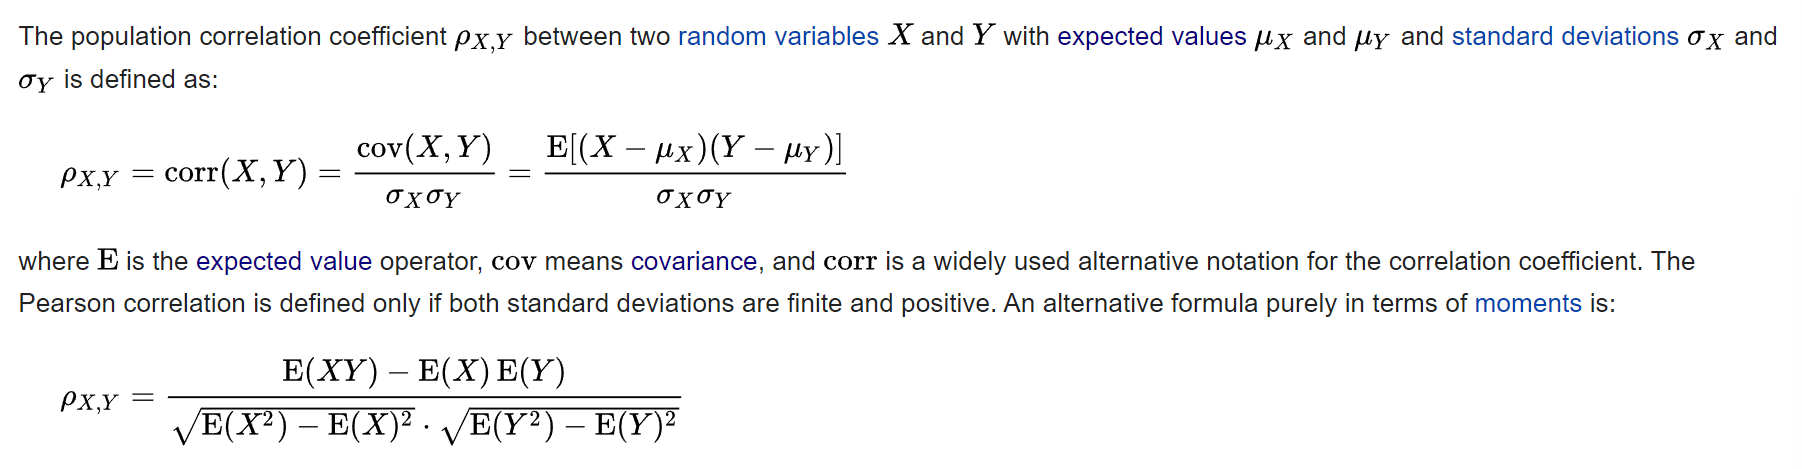

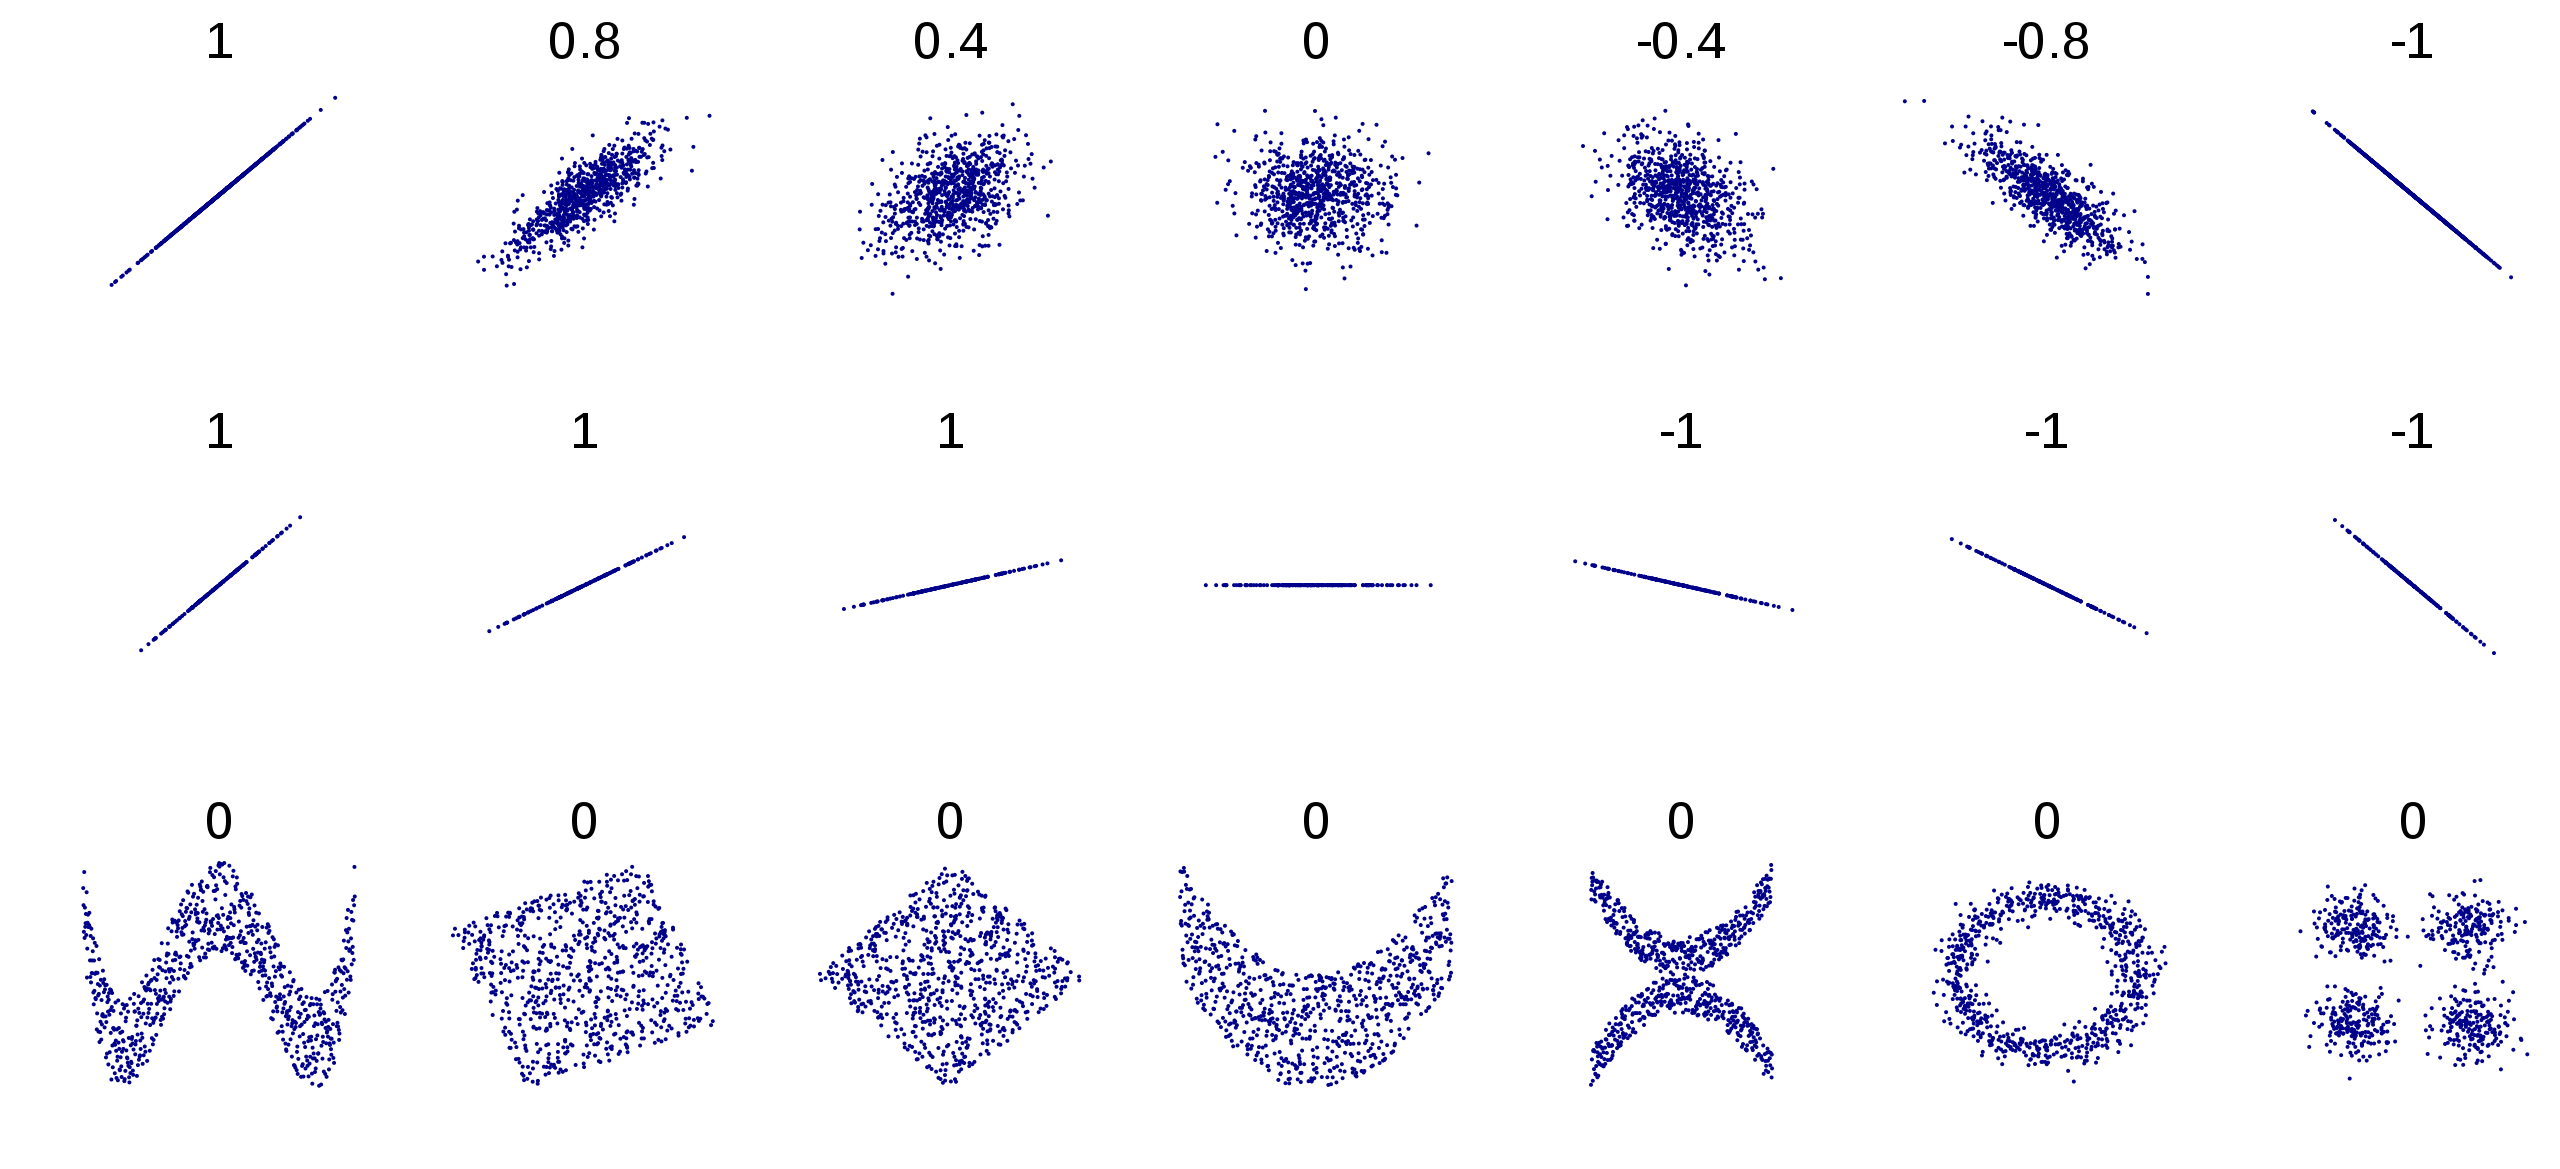

# Pearson Correlation coefficient

- the Pearson correlation coefficient ― also known as Pearson's r, the Pearson product-moment correlation coefficient (PPMCC), the bivariate correlation, or colloquially simply as the correlation coefficient ― is `a measure of linear correlation between two sets of data`. 


- It is `the ratio between the covariance of two variables and the product of their standard deviations`; thus, it is essentially a `normalized measurement of the covariance`, such that the `result always has a value between −1 and 1`.


- As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationships or correlations. 

- As a simple example, one would expect the age and height of a sample of teenagers from a high school to have a Pearson correlation coefficient significantly greater than 0, but less than 1 (as 1 would represent an unrealistically perfect correlation).

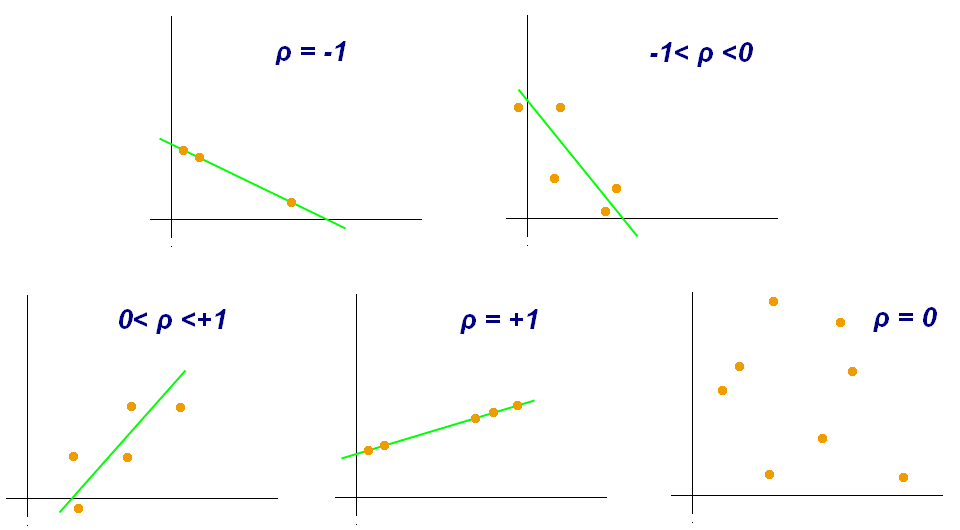

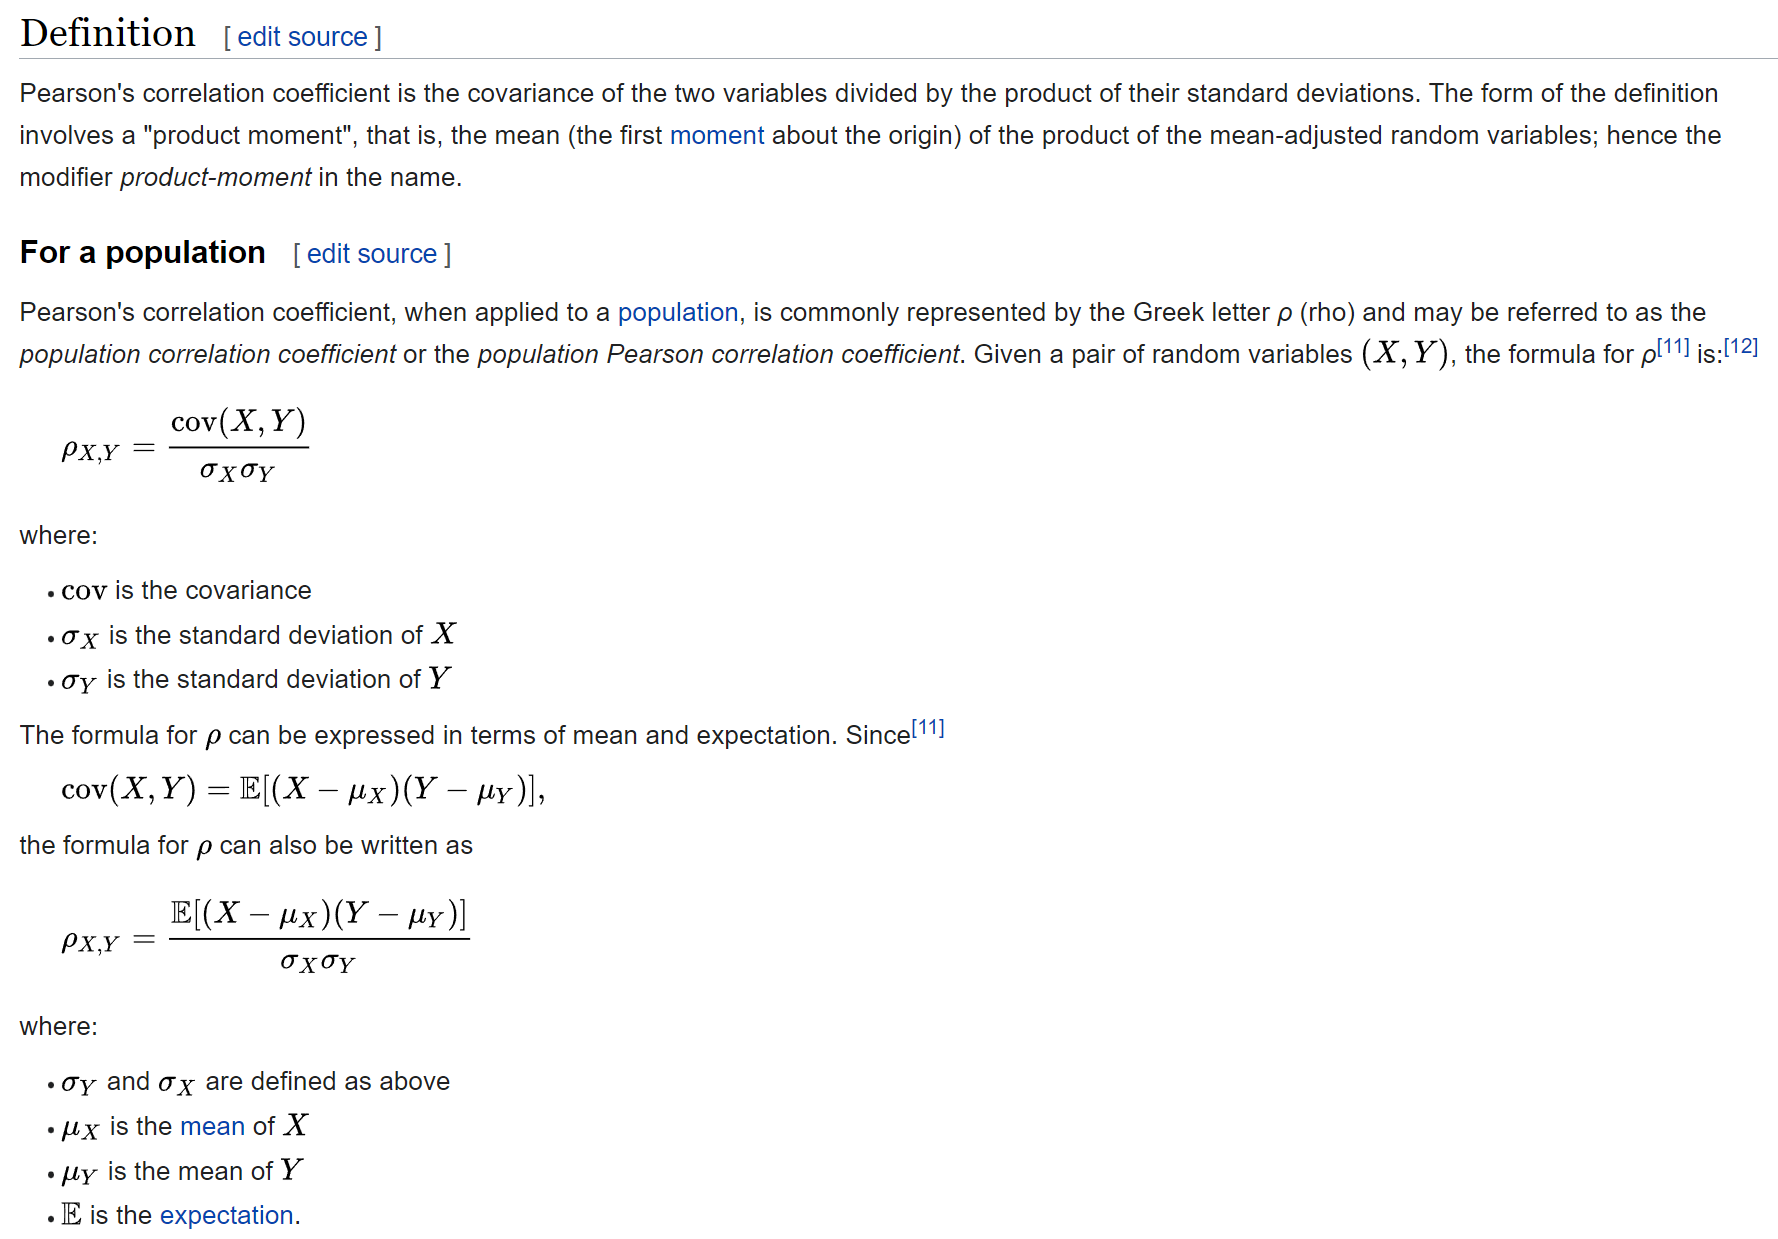

In [2]:
data = sns.load_dataset("tips")[["total_bill","tip"]]

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

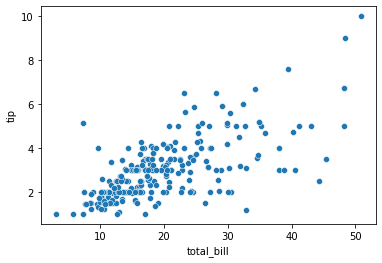

In [3]:
sns.scatterplot(data["total_bill"],data["tip"])

In [4]:
x = data["total_bill"]
y = data["tip"]

In [5]:
covariance_of_x_and_y = (np.sum((x - np.mean(x))*(y - np.mean(y))))/len(x)
covariance_of_x_and_y

8.289388917629669

    becase covaiance of x and y is +ve : x and y are positively correlated.

In [6]:
correlation_of_x_and_y = covariance_of_x_and_y/(np.std(x)*np.std(y))
correlation_of_x_and_y

0.6757341092113643

In [30]:
data.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [31]:
data.corr(method="spearman")

,total_bill,tip
total_bill,1.000000,0.678968
tip,0.678968,1.000000


In [33]:
data.corr(method="kendall")

,total_bill,tip
total_bill,1.000000,0.517181
tip,0.517181,1.000000


In [8]:
x

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

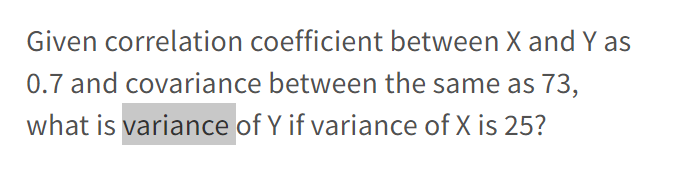

In [9]:
((73/5)/0.7)**2

435.0204081632653

# Spearman's rank correlation coefficient

- In statistics, Spearman's rank correlation coefficient or Spearman's ρ, named after Charles Spearman and often denoted by the Greek letter   (rho) or as r_{s}, is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables).


- It assesses how well the relationship between two variables can be described using a `monotonic function.`


- The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not).
- If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other.


- Intuitively, the Spearman correlation between two variables will be high when observations have a similar (or identical for a correlation of 1) rank (i.e. relative position label of the observations within the variable: 1st, 2nd, 3rd, etc.) between the two variables, and low when observations have a dissimilar (or fully opposed for a correlation of −1) rank between the two variables.



- Spearman's coefficient is appropriate for both continuous and discrete ordinal variables.
- Both Spearman's rho  and Kendall's tau  can be formulated as special cases of a more general correlation coefficient.

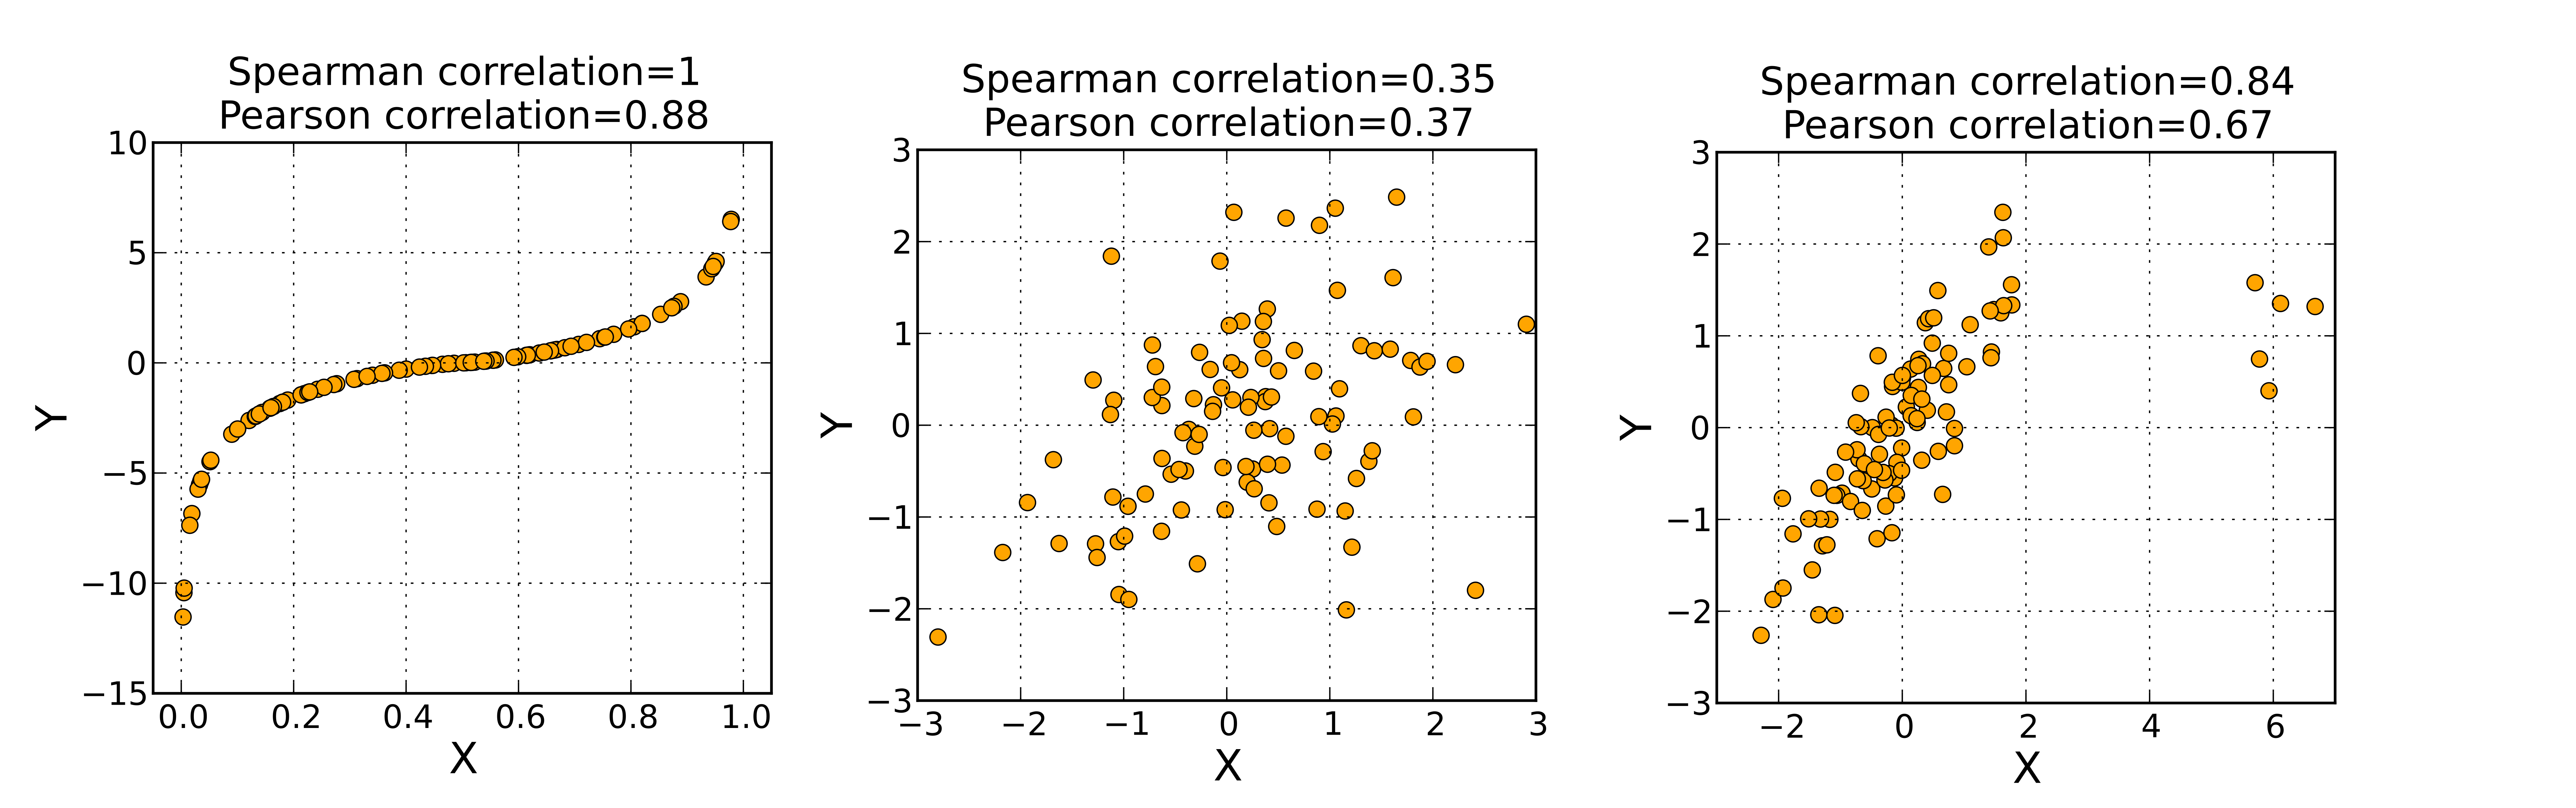

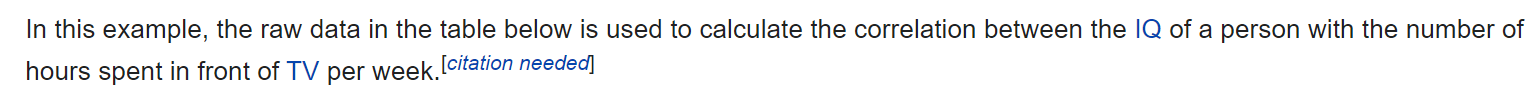

In [63]:
IQ = np.array([106,100,86,101,99,103,97,113,112,110])

In [64]:
HrsOFtv = np.array([7,27,2,50,28,29,20,12,6,17])

In [65]:
df = pd.DataFrame([IQ,HrsOFtv]).T

<IPython.core.display.Javascript object>

In [66]:
df.columns = ["IQ","HrsOFtv"]

In [67]:
df

,IQ,HrsOFtv
0,106,7
1,100,27
2,86,2
3,101,50
4,99,28
5,103,29
6,97,20
7,113,12
8,112,6
9,110,17


In [68]:
df = df.sort_values(by="IQ")

In [69]:
df["RankXi"] =df["IQ"].rank()

In [70]:
df["RankYi"] =df["HrsOFtv"].rank()

In [71]:
df["di"] = df["RankXi"]-df["RankYi"]

In [72]:
df["di^2"] = (df["di"])**2

In [73]:
df

,IQ,HrsOFtv,RankXi,RankYi,di,di^2
2,86,2,1.0,1.0,0.0,0.0
6,97,20,2.0,6.0,-4.0,16.0
4,99,28,3.0,8.0,-5.0,25.0
1,100,27,4.0,7.0,-3.0,9.0
3,101,50,5.0,10.0,-5.0,25.0
5,103,29,6.0,9.0,-3.0,9.0
0,106,7,7.0,3.0,4.0,16.0
9,110,17,8.0,5.0,3.0,9.0
8,112,6,9.0,2.0,7.0,49.0
7,113,12,10.0,4.0,6.0,36.0


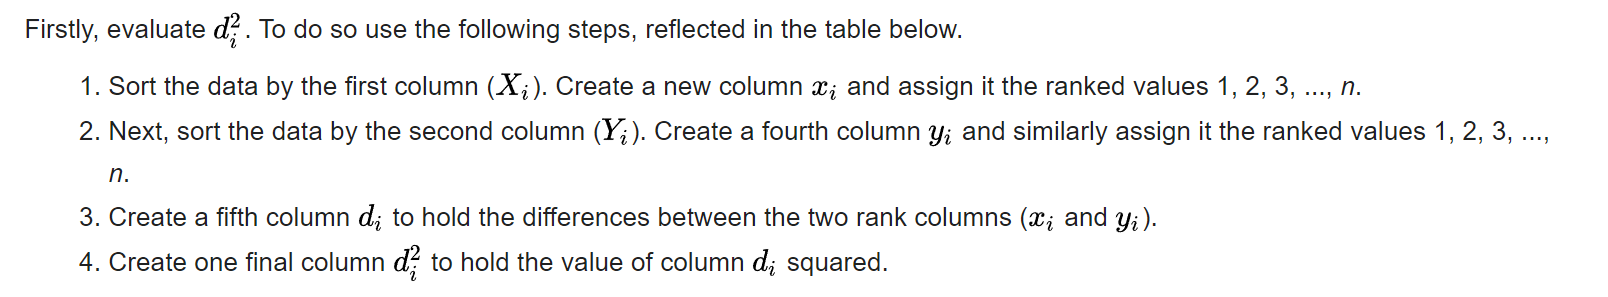

In [74]:
stats.spearmanr(df["IQ"],df["HrsOFtv"])

<IPython.core.display.Javascript object>

SpearmanrResult(correlation=-0.17575757575757575, pvalue=0.6271883447764844)

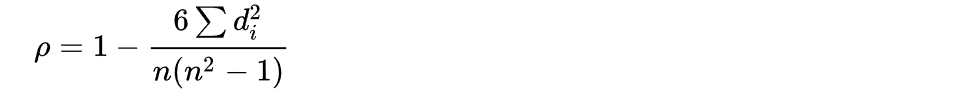

In [75]:
1-( (6*np.sum(df["di^2"])) /  (  len(df) * (len(df)**2-1)))

-0.17575757575757578

#### another example : calulation of spearman rank correlation coefficient 

In [26]:
data = sns.load_dataset("tips")[["total_bill","tip"]]
x = data["total_bill"]
y = data["tip"]

In [111]:
data["Xrank"] = data["total_bill"].rank(method="average")
data["Yrank"] = data["tip"].rank(method="average")

In [112]:
data["d"] = data["Xrank"]-data["Yrank"]

In [113]:
data["d^2"] = (data["d"])**2

In [114]:
data 


,total_bill,tip,Xrank,Yrank,d,d^2
0,16.99,1.01,113.0,5.0,108.0,11664.00
1,10.34,1.66,25.5,33.0,-7.5,56.25
2,21.01,3.50,162.5,177.0,-14.5,210.25
3,23.68,3.31,179.0,165.0,14.0,196.00
4,24.59,3.61,187.0,185.0,2.0,4.00
...,...,...,...,...,...,...
239,29.03,5.92,209.0,236.0,-27.0,729.00
240,27.18,2.00,201.0,62.0,139.0,19321.00
241,22.67,2.00,172.0,62.0,110.0,12100.00
242,17.82,1.75,124.0,38.0,86.0,7396.00


In [115]:
1-( (6*np.sum(data["d^2"])) /  (  len(data) * ((len(data)**2)-1)))

0.6795579676922379

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

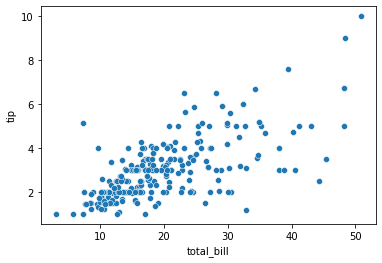

In [116]:
sns.scatterplot(data["total_bill"],data["tip"])

In [117]:
stats.spearmanr(data["tip"],data["total_bill"])

<IPython.core.display.Javascript object>

SpearmanrResult(correlation=0.6789681219001009, pvalue=2.501158440923619e-34)

In [118]:
stats.pearsonr(data["tip"],data["total_bill"])

<IPython.core.display.Javascript object>

(0.6757341092113642, 6.6924706468640476e-34)